<a href="https://colab.research.google.com/github/DouglasTeyh/Network-Intrusion-Detection-Project/blob/main/Detec%C3%A7%C3%A3o_de_intrus%C3%A3o_de_rede_com_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bibliotecas utilizadas

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Carregando o Dataset

In [ ]:
#faremos a leitura dos arquivos do Dataset disponibilizado no Kaggle

df_train = pd.read_csv('/content/Train_data.csv')

In [ ]:
print(f'Dados para Treino: {df_train.shape[0]} linhas e {df_train.shape[1]} colunas.') #exibe a quantidade de Dados que serão analisados

Dados para Treino: 25192 linhas e 42 colunas.


In [ ]:
#exibir em tabela, os dados que foram recebidos.
df_train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


#Análise Exploratória

In [ ]:
#Vizualizando uma breve descrição geral do df_treino.
df_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#visualização da frequencia de acessos e sua respectiva classificação

df_train['class'].value_counts()

,count
class,
normal,13449
anomaly,11743


Text(0.5, 1.0, 'frequencia com base na classificação')

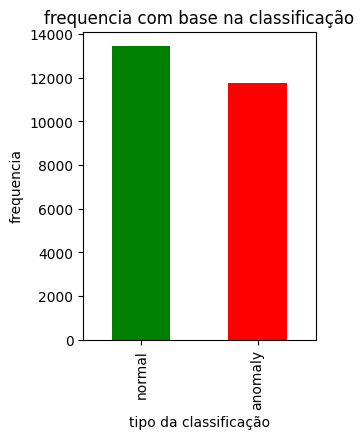

In [ ]:
#usando o matplotlib para visualização.

df_train['class'].value_counts().plot(kind='bar',
                                       figsize=(3,4),
                                       color=['green', 'red'],
                                       )
plt.xlabel('tipo da classificação')
plt.ylabel('frequencia')
plt.title('frequencia com base na classificação')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

#transformar os dados categóricos em números

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
def transform_categ_num(df):
    leProtocol = LabelEncoder()
    leService = LabelEncoder()
    leFlag = LabelEncoder()

    df['protocol_type'] = leProtocol.fit_transform(df['protocol_type'])
    df['service'] = leService.fit_transform(df['service'])
    df['flag'] = leFlag.fit_transform(df['flag'])

In [ ]:
transform_categ_num(df_train)

In [ ]:
df_train.info()#todos os Objects foram convertidos para numeros. exceto o class, pois é saida (y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  int64  
 2   service                      25192 non-null  int64  
 3   flag                         25192 non-null  int64  
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

#Treino

In [ ]:
#Separando os arquivos de Treino
X_train = df_train.drop('class', axis=1)
y_train = df_train['class']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#preparando o modelo e treinando
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
X_test = pd.read_csv('/content/Test_data.csv') #carregando dataset de teste

In [ ]:
transform_categ_num(X_test) #transformando as colunas (do tipo object) para Numericas

In [ ]:
X_test.info()#verificando os tipos do valores da colunas foram alterados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  int64  
 2   service                      22544 non-null  int64  
 3   flag                         22544 non-null  int64  
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [ ]:
y_test = rfc.predict(X_test) #realizando a predição do arquivo de teste e atribuindo ela.

In [ ]:
acuracia = rfc.score(X_test, y_test) #realizando a verificação da acuracia do modelo

In [ ]:
#exibindo a acuracia  de duas formas.
print(f'Acuracia do Modelo Treinado RFC: {acuracia:.2f}')
emPorcent = acuracia * 100
print(f'ou então: {emPorcent:.2f}%')

Acuracia do Modelo Treinado RFC: 1.00
ou então: 100.00%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Ger a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

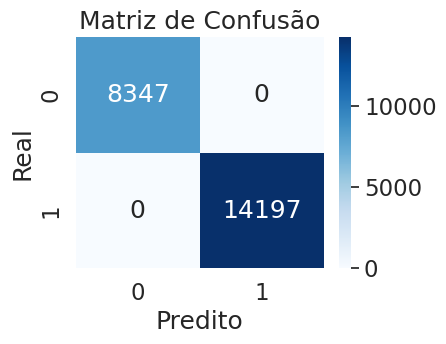

In [ ]:
# Exibe a matriz com heatmap do seaborn
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred)) #exibindo informações sobre o modelo treinado

              precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      8347
      normal       1.00      1.00      1.00     14197

    accuracy                           1.00     22544
   macro avg       1.00      1.00      1.00     22544
weighted avg       1.00      1.00      1.00     22544



#Overfitting???

In [ ]:
# Acurácia no conjunto de treinamento
train_accuracy = model.score(X_train, y_train)
print(f'Acurácia no Treinamento: {train_accuracy:.4f}')

# acurácia no conjunto de teste
test_accuracy = model.score(X_test, y_test)
print(f'Acurácia no Teste: {test_accuracy:.4f}')


Acurácia no Treinamento: 1.0000
Acurácia no Teste: 1.0000


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Validação cruzada (5 folds)
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Exibir a média e desvio padrão da acurácia
print(f'Média de Acurácia na Validação Cruzada: {np.mean(cv_scores):.4f}')
print(f'Desvio Padrão da Acurácia na Validação Cruzada: {np.std(cv_scores):.4f}')

Média de Acurácia na Validação Cruzada: 0.9972
Desvio Padrão da Acurácia na Validação Cruzada: 0.0004
